In [1]:
#df =pd.read_csv("International_Report_Passengers.csv",index_col="data_dte",parse_dates=["data_dte"])
#df1 = pd.DataFrame(df, columns = ['fg_wac', 'Total'])
#df1
#dataset.dropna(inplace=True)

In [2]:
#del(df['usg_apt_id'])
#del(df['Scheduled'])
#del(df['Charter'])
#del(df['usg_apt'])
#del(df['fg_apt'])
#del(df['year'])
#del(df['month'])
#Nos quedamos con las variables más relevantes
#df = pd.DataFrame(df, columns = ['fg_wac', 'Total'])

# Preprocesamiento

In [3]:
# Instalación libreria tensorflow-gpu

# from IPython.display import clear_output
# import warnings
# warnings.filterwarnings('ignore')

# Instalación de la libreria y limpiar salida
# !pip install tensorflow-gpu
# clear_output()
# import tensorflow as tf

# Comprobar que se ha instalado correctamente
# print('[+] GPU disponible: ', tf.test.is_gpu_available())
# Mostrar las GPU
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)
#    print("Name:", gpu.name, "  Type:", gpu.device_type)

## Importacion de librerias

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## Carga del dataset y seleccion de columnas

In [5]:
#df =pd.read_csv("International_Report_Passengers.csv",parse_dates=["data_dte"])
df = pd.read_csv("Datasets/International_Report_Passengers.csv",parse_dates=["data_dte"])


#df = pd.DataFrame(df, columns = ['data_dte','fg_wac', 'Total'])
#datasetob1=df
df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,2014-05-01,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,2007-06-01,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,2005-12-01,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,2003-04-01,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,2005-12-01,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680980,2015-10-01,2015,10,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,130217,0,130217
680981,2014-09-01,2014,9,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,132052,0,132052
680982,2014-10-01,2014,10,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,132822,0,132822
680983,2014-08-01,2014,8,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,134263,0,134263


### Descripcion de variables

In [6]:
df.dtypes

data_dte        datetime64[ns]
Year                     int64
Month                    int64
usg_apt_id               int64
usg_apt                 object
usg_wac                  int64
fg_apt_id                int64
fg_apt                  object
fg_wac                   int64
airlineid                int64
carrier                 object
carriergroup             int64
type                    object
Scheduled                int64
Charter                  int64
Total                    int64
dtype: object

### Identificación de valores faltantes

In [7]:
#Pasamos caracteres raros a nan para poder identificarlos
df[df == '?'] = np.nan

#Hacemos conteo de los valores nulos
print(df.isnull().sum())

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64


### Tratamiento de valores faltantes

In [8]:
df=df.dropna(axis = 1)
#Pasamos caracteres raros a nan para poder identificarlos
df[df == '?'] = np.nan

#Hacemos conteo de los valores nulos
print(df.isnull().sum())

C:\Users\vicsi\AppData\Local\Temp\ipykernel_14460\2208750976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df == '?'] = np.nan
C:\Users\vicsi\AppData\Local\Temp\ipykernel_14460\2208750976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df == '?'] = np.nan


data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64


### Analizamos caracteristicas

In [9]:
input_data=df[df.columns[:-1]]
input_data.skew() 

C:\Users\vicsi\AppData\Local\Temp\ipykernel_14460\2835794893.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  input_data.skew()


Year            -0.192840
Month            0.058169
usg_apt_id      25.097443
usg_wac          0.489536
fg_apt_id        0.005399
fg_wac           0.465334
airlineid        1.446007
carriergroup    -0.250882
Scheduled        2.738361
Charter         11.635794
dtype: float64

In [10]:
#input_data.plot(kind="density",subplots=True,layout=(4,4),sharex=False,sharey=False)

<h1>Jose, pongo aquí lo que he hecho para deputar el dataset.</h1>

In [11]:
import requests
from bs4 import BeautifulSoup as bs

# Cargo el diccionario de paises

url = 'https://github.com/stefangabos/world_countries/blob/master/data/countries/cs/countries.csv'
content = requests.get(url).content
soup = bs(content, "html.parser")
datos = soup.find_all('tr', attrs={'class': 'js-file-line'})

paises_alfa = {}

for row in datos:
    cell = [i.text for i in row.find_all('td')]
    if len(cell) > 1:
        paises_alfa[cell[3].upper()] = cell[4]
#paises_alfa

In [12]:
# Diccionario de países por código numérico

url = 'https://github.com/tasneem/greenhouse-emitters/blob/master/data/lookup-tables/L_WORLD_AREA_CODES.csv'
content = requests.get(url).content
soup = bs(content, "html.parser")
datos = soup.find_all('tr', attrs={'class': 'js-file-line'})

paises_num = {}

for row in datos:
    cell = [i.text for i in row.find_all('td')]
    if len(cell) > 1:
        paises_num[cell[1].upper()] = cell[2]
        
#paises_num

In [13]:
# Diccionario de aeropuertos. Columna fg_apt_id

url = 'https://github.com/tasneem/greenhouse-emitters/blob/master/data/lookup-tables/L_AIRPORT_ID.csv'
content = requests.get(url).content
soup = bs(content, "html.parser")
datos = soup.find_all('tr', attrs={'class': 'js-file-line'})

aeropuertos = {}

for row in datos:
    cell = [i.text for i in row.find_all('td')]
    if len(cell) > 1:
        aeropuertos[int(cell[1])] = cell[2]
        
#aeropuertos

In [14]:
# Diccionario de compañías aéreas. Código alfanumérico 3 dig. Columna carrier

url = 'https://github.com/tasneem/greenhouse-emitters/blob/master/data/lookup-tables/L_UNIQUE_CARRIERS.csv'
content = requests.get(url).content
soup = bs(content, "html.parser")
datos = soup.find_all('tr', attrs={'class': 'js-file-line'})

dic_carrier = {}

for row in datos:
    cell = [i.text for i in row.find_all('td')]
    if len(cell) > 1:
        dic_carrier[cell[1].upper()] = cell[2]
        
#dic_carrier

In [15]:
# Diccionario de compañía aérea. Código numérico de 5 dig. Columna airlineid

import csv

with open("Datasets/L_AIRLINE_ID.csv") as file:
    reader = csv.reader(file)
    next(reader) # Descartamos cabecera
    dic_airlineid = dict(reader)
#dic_airlineid

In [16]:
datos = pd.read_csv('Datasets/International_Report_Passengers.csv')
# Eliminamos las columnas usg_apt y fg_apt puesto que contienen el mismo dato que las columnas usg_apt_id y fg_apt_id respectivamente
# Eliminamos las columnas que nos indican de donde parten los viajeros. Lo que nos importa es el destino.
# Eliminamos la columna que nos indica el número de pasageros en vuelos charter. Nos interesa el número total.

datos.drop(['type','Scheduled','usg_apt','usg_apt_id','usg_wac','fg_apt','carriergroup','Charter'], axis=1, inplace=True)
datos.head()

,data_dte,Year,Month,fg_apt_id,fg_wac,airlineid,carrier,Total
0,05/01/2014,2014,5,11032,148,19534,AM,315
1,06/01/2007,2007,6,16085,951,20364,C6,683
2,12/01/2005,2005,12,10411,277,20344,RD,1010
3,04/01/2003,2003,4,16304,148,20204,MG,508
4,12/01/2005,2005,12,11138,766,20312,TZ,76


In [17]:
# Agrupo y sumo los datos por año, mes y destino

datos_agrupados = datos.groupby(['Year','Month','fg_apt_id']).agg(
                                  {'Total': 'sum',
                                  }).reset_index()

nom_aeropuertos = [aeropuertos.get(x) for x in datos_agrupados['fg_apt_id']]
datos_agrupados['aeropuerto'] = nom_aeropuertos

datos_agrupados

,Year,Month,fg_apt_id,Total,aeropuerto
0,1990,1,10148,58212,"Acapulco, Mexico: General Juan N Alvarez Inter..."
1,1990,1,10174,1309,"San Andres Island, Colombia: Gustavo Rojas Pin..."
2,1990,1,10205,2543,"Malaga, Spain: Malaga Costa del Sol"
3,1990,1,10244,64280,"Auckland, New Zealand: Auckland International"
4,1990,1,10287,967,"Amman, Jordan: Queen Alia International"
...,...,...,...,...,...
94334,2020,3,16825,36,None
94335,2020,3,16835,1,None
94336,2020,3,16845,28,None
94337,2020,3,16858,96583,None


<h1>Hasta aquí lo de Pablo</h1>

### Eliminamos columnas que no son relevantes

In [18]:
df = pd.DataFrame(df, columns = ['data_dte','fg_wac', 'Total'])
#datasetob1=df

## División por pais

### Carga de codigos WAC para poder saber qué codigo es cada pais

In [19]:
destinos =pd.read_csv("Datasets/L_WORLD_AREA_CODES.csv")
destinos

,Code,Description
0,1,Alaska
1,2,Hawaii
2,3,Puerto Rico
3,4,U.S. Virgin Islands
4,5,U.S. Pacific Trust Territories and Possessions
...,...,...
328,951,Nova Scotia
329,956,Prince Edward Island
330,961,Newfoundland and Labrador
331,975,Greenland


### Estudio de la distribución para seleccionar destinos más relevantes

fg_wac
204     24552
736     30619
493     39979
936     52746
148    117423
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


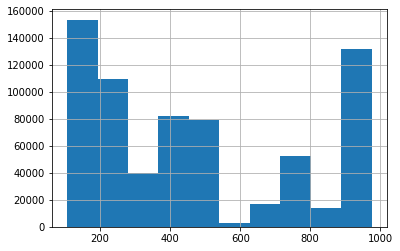

In [20]:
obejtivos = df.groupby('fg_wac').size()
print(obejtivos.sort_values().tail())
print(df["fg_wac"].hist())

In [21]:
obejtivo1 = destinos[destinos['Code'] == 204]
obejtivo2 = destinos[destinos['Code'] == 736]
obejtivo3 = destinos[destinos['Code'] == 493]
obejtivo4 = destinos[destinos['Code'] == 936]
obejtivo5 = destinos[destinos['Code'] == 148]
print(obejtivo1)
print(obejtivo2)
print(obejtivo3)
print(obejtivo4)
print(obejtivo5)

    Code Description
65   204     Bahamas
     Code Description
257   736       Japan
     Code     Description
165   493  United Kingdom
     Code Description
325   936     Ontario
    Code Description
59   148      Mexico


### Creamos dataset filtrado con  uno de los paises más recurridos 

In [22]:
#datasetob1 = df[df['fg_wac'] == 204]
#datasetob2 = df[df['fg_wac'] == 736]
#datasetob3 = df[df['fg_wac'] == 493]
#datasetob4 = df[df['fg_wac'] == 936]
#datasetob5 = df[df['fg_wac'] == 148]
datasetob1 = df[df['fg_wac'] == 148]

### Agrupado y sumado del total de pasageros por año

In [23]:
#datasetob1 = df[df['fg_wac'] == 204]
datasetob1 = pd.DataFrame(datasetob1, columns = ['data_dte', 'Total'])
datasetob1=datasetob1.groupby(by=['data_dte']).sum().groupby(level=[0]).cumsum()
#datasetob1.set_index('Year')
datasetob1
#datasetob1 = pd.DataFrame(datasetob1, columns = ['Total'])
#dataset.dropna(inplace=True)

,Total
data_dte,
1990-01-01,801818
1990-02-01,744210
1990-03-01,888259
1990-04-01,850439
1990-05-01,708540
...,...
2019-11-01,2402661
2019-12-01,2890144
2020-01-01,2776134


# Proceso de Predicción

In [24]:
#ahora solo necesitaremos el total y la fecha para la prediccion
#datasetob1 = pd.DataFrame(datasetob1, columns = ['Total'])
train = pd.DataFrame(datasetob1.Total[:"2018"])
test = pd.DataFrame(datasetob1.Total["2019":])
train.tail(100)

,Total
data_dte,
2010-09-01,983069
2010-10-01,1168519
2010-11-01,1304977
2010-12-01,1586925
2011-01-01,1595413
...,...
2018-08-01,2587950
2018-09-01,1794042
2018-10-01,2098763


In [25]:
minmaxSc=MinMaxScaler()
sc_train= minmaxSc.fit_transform(train)
windows = 5
X_train = []
Y_train = []
#print(windows)
#rint(sc_train.size)
for i in range(windows,sc_train.size):
    X_train.append(sc_train[i-windows:i,0])
    Y_train.append(sc_train[i,0])
print(X_train)

[array([0.0659498 , 0.0423371 , 0.10138074, 0.08587886, 0.02771648]), array([0.0423371 , 0.10138074, 0.08587886, 0.02771648, 0.04775046]), array([0.10138074, 0.08587886, 0.02771648, 0.04775046, 0.11662111]), array([0.08587886, 0.02771648, 0.04775046, 0.11662111, 0.13971777]), array([0.02771648, 0.04775046, 0.11662111, 0.13971777, 0.        ]), array([0.04775046, 0.11662111, 0.13971777, 0.        , 0.02787387]), array([0.11662111, 0.13971777, 0.        , 0.02787387, 0.05287158]), array([0.13971777, 0.        , 0.02787387, 0.05287158, 0.09437989]), array([0.        , 0.02787387, 0.05287158, 0.09437989, 0.07299492]), array([0.02787387, 0.05287158, 0.09437989, 0.07299492, 0.02556622]), array([0.05287158, 0.09437989, 0.07299492, 0.02556622, 0.12311125]), array([0.09437989, 0.07299492, 0.02556622, 0.12311125, 0.09047573]), array([0.07299492, 0.02556622, 0.12311125, 0.09047573, 0.07005112]), array([0.02556622, 0.12311125, 0.09047573, 0.07005112, 0.08739298]), array([0.12311125, 0.09047573, 0.

In [ ]:
X_train,Y_train = np.array(X_train),np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
modelo=Sequential()
modelo.add(LSTM(units=600, input_shape=(X_train.shape[1],1)))
modelo.add(Dense(1))
modelo.compile(optimizer="adam",loss="mse")
modelo.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
6/6 [==============================] - 11s 175ms/step - loss: 0.0706
Epoch 2/10
6/6 [==============================] - 1s 130ms/step - loss: 0.0235
Epoch 3/10
6/6 [==============================] - 1s 179ms/step - loss: 0.0195
Epoch 4/10
6/6 [==============================] - 1s 134ms/step - loss: 0.0151
Epoch 5/10
6/6 [==============================] - 1s 134ms/step - loss: 0.0144
Epoch 6/10
6/6 [==============================] - 1s 160ms/step - loss: 0.0138
Epoch 7/10
2/6 [=========>....................] - ETA: 0s - loss: 0.0120

In [ ]:
sc_test = minmaxSc.transform(test)
X_test = []
for i in range(windows,sc_test.size):
    X_test.append(sc_test[i-windows:i,0])

In [ ]:
X_test=np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=modelo.predict(X_test)
pred=minmaxSc.inverse_transform(pred)

In [ ]:
test["pred"]=np.concatenate(([np.nan]*windows,pred),axis=None)
plt.plot(test["Total"],color="darkcyan")
plt.plot(test["pred"],color="darkslategrey")
#plt.ylim(1.1*np.min(pred)/2, 1.1 *np.max(pred))
plt.show()